# Data: Takeaway Food Orders
https://www.kaggle.com/datasets/henslersoftware/19560-indian-takeaway-orders/versions/4?resource=download

In [2]:
# pip install pandasql

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
import warnings
warnings.filterwarnings('ignore')
pysqldf = lambda q: sqldf(q, globals())

In [9]:
orders = pd.read_csv("./data/restaurant-1-orders.csv")
orders.head()

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6


In [10]:
orders.columns = ['number','timestamp','item','quantity','price','total_products_in_cart']
orders['date'] = pd.to_datetime(orders['timestamp'].str[:10])

In [11]:
orders.sample(2)

,number,timestamp,item,quantity,price,total_products_in_cart,date
34412,9185,13/04/2018 19:42,Special Fried Rice,1,3.95,8,2018-04-13
23174,8451,09/02/2018 11:57,Plain Rice,1,2.95,7,2018-09-02


In [12]:
print(f"Total number of orders in datasets: {orders['number'].nunique()}")

Total number of orders in datasets: 13397


In [13]:
def load_query(path):
    with open(path) as file:
        return file.read()

# case 1 : Direct multistep forecasting

In [22]:
query = load_query("./queries/daily_orders.sql")
daily_orders = pysqldf(query)

In [24]:
daily_orders.sample(3)

,date,num_orders
103,2016-06-11,12
1157,2019-07-17,7
297,2017-01-26,10


In [25]:
import logging
logging.getLogger().setLevel(logging.CRITICAL) # prevent the matplotlib infos on categorical x-axis, removable

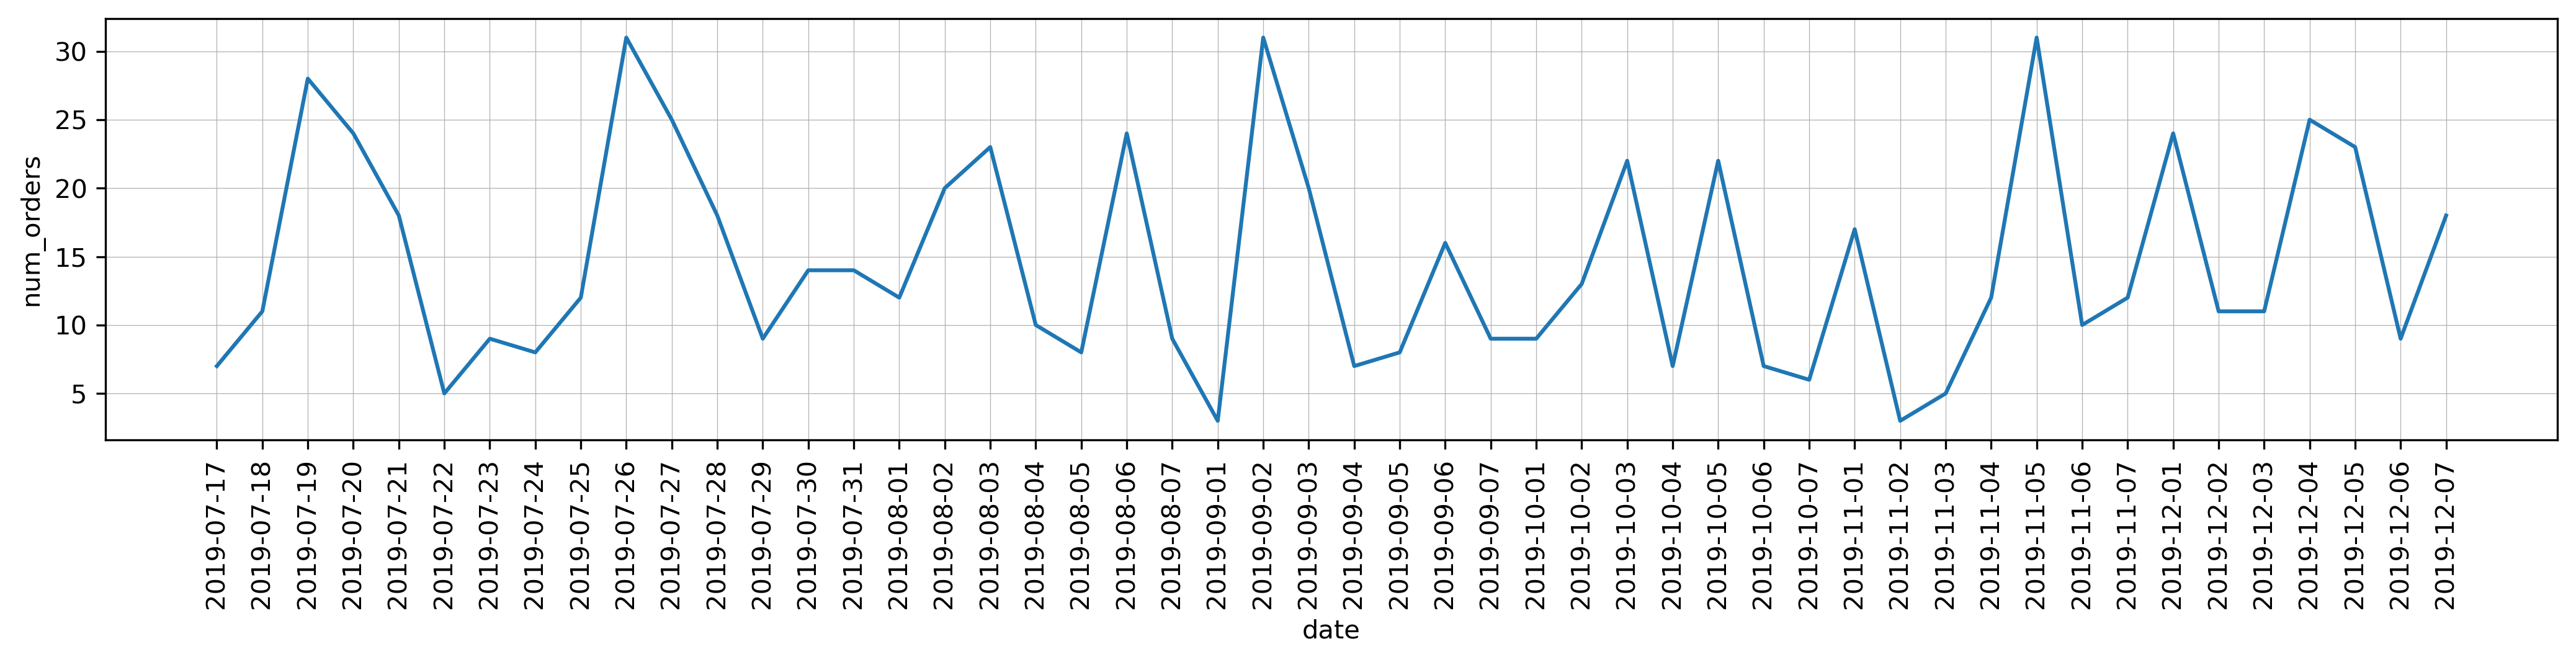

In [27]:
plt.rcParams.update({"figure.figsize": (17,3), "figure.dpi":300})
fig,ax = plt.subplots()
sns.lineplot(data=daily_orders.tail(50), x='date', y= 'num_orders')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [30]:
query = load_query("./queries/weekly_orders.sql")
weekly_orders = pysqldf(query)

In [32]:
weekly_orders.head()

,week,num_orders
0,2015-01-05,8
1,2015-02-09,5
2,2015-08-03,3
3,2015-09-07,6
4,2015-09-28,7


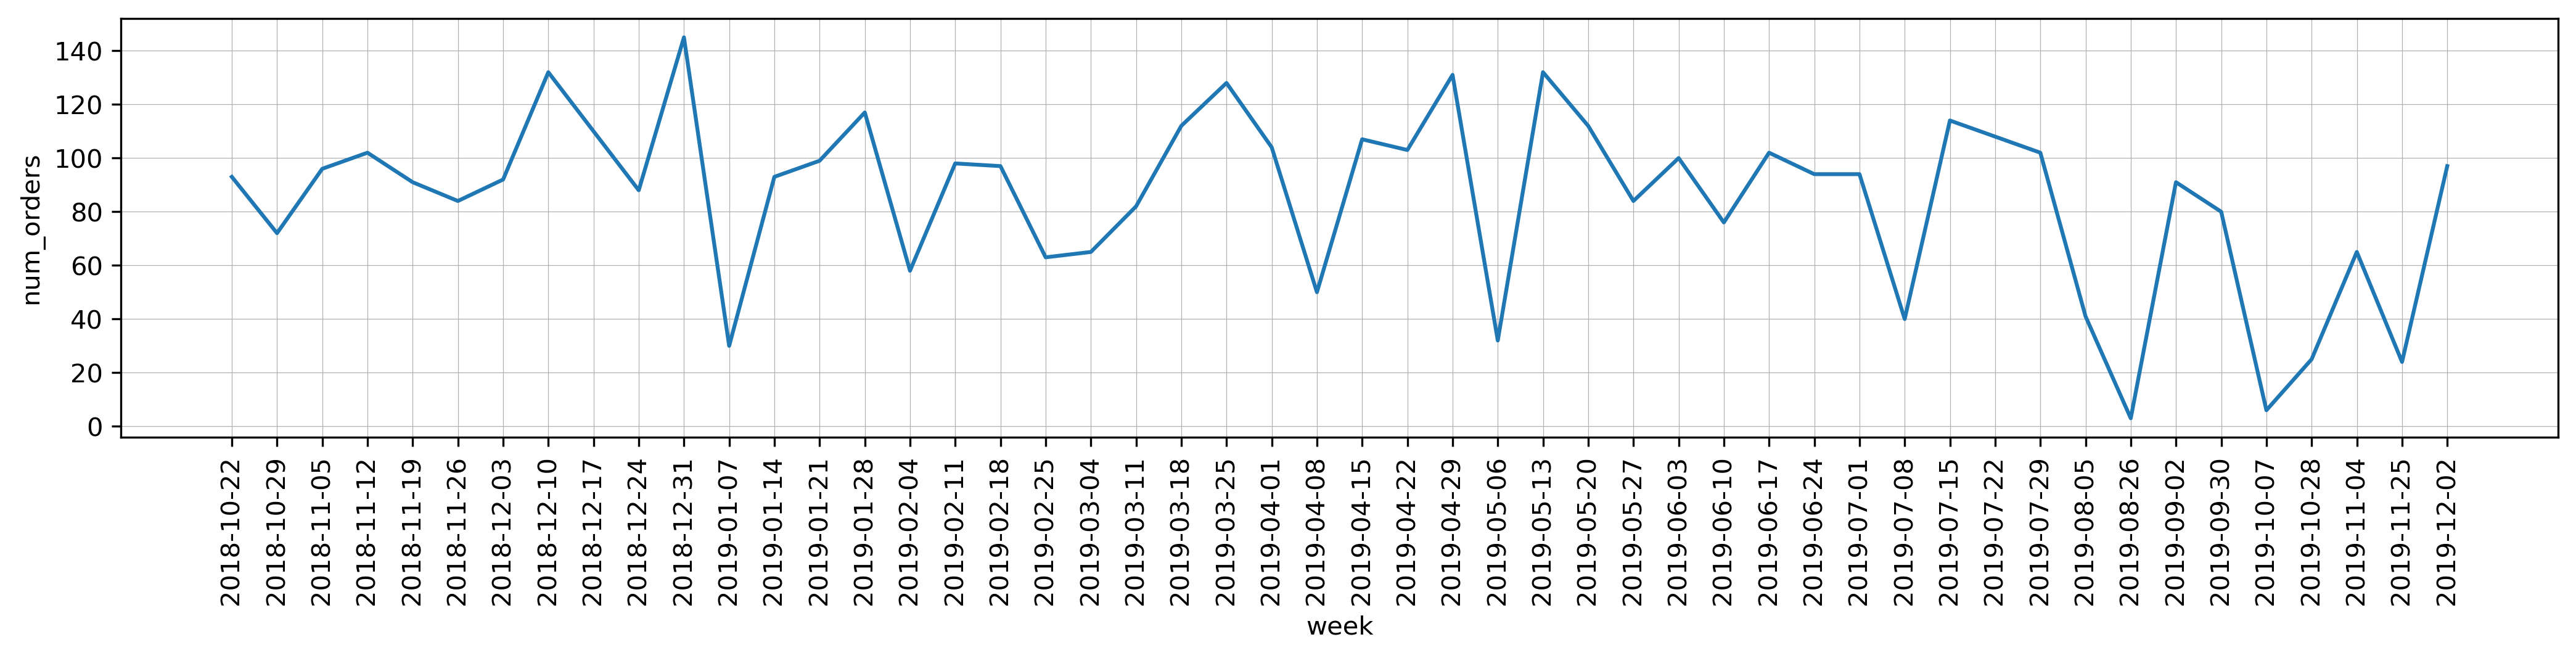

In [34]:
plt.rcParams.update({"figure.figsize": (17,3), "figure.dpi":300})
fig,ax = plt.subplots()
sns.lineplot(data=weekly_orders.tail(50), x='week', y= 'num_orders')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)